Acessar o simulador. Clicar nas caixas de seleção "Valores do gráfico" e "Intensidade". Escolher dez valores de temperatura arbitrários variando a seta ao lado do termômetro. Para cada valor de temperatura anotar o comprimento de onda de emissão máxima e a intensidade total de irradiação. De posse dos valores obtidos:

https://phet.colorado.edu/sims/html/blackbody-spectrum/latest/blackbody-spectrum_pt.html

1) Fazer um gráfico da temperatura (eixo x) versus comprimento de onda de emissão máxima (eixo y) e usar como função de ajuste (fit wizard no qtiplot) A*x^B. Comparar os valores obtidos para os parâmetros A e B com o esperado pela Lei de deslocamento de Wien.

In [1]:
temp_array = [2500, 3000, 3200, 3550, 4000, 4300, 4600, 4750, 4900, 5000]   #K
em_array = [1.26, 3.13, 4.32, 7.26, 13.18, 18.92, 26.50, 31.12,  36.35, 40.21]    #MW/m^2/𝜇m 
comp_array = [1.159, 0.966, 0.906, 0.816, 0.724, 0.674, 0.630, 0.610, 0.591, 0.58]   #𝜇m

In [2]:
import pandas as pd

In [3]:
data = {
    'Temperatura [K]': temp_array,
    'Densidade de potencia [MW/m^2/𝜇m]': em_array,
    'Comprimento de onda [𝜇m]': comp_array
}

df = pd.DataFrame(data)

display(df)

,Temperatura [K],Densidade de potencia [MW/m^2/𝜇m],Comprimento de onda [𝜇m]
0,2500,1.26,1.159
1,3000,3.13,0.966
2,3200,4.32,0.906
3,3550,7.26,0.816
4,4000,13.18,0.724
5,4300,18.92,0.674
6,4600,26.50,0.630
7,4750,31.12,0.610
8,4900,36.35,0.591
9,5000,40.21,0.580


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [5]:
plt.style.use(['science', 'notebook', 'grid'])

Inserindo equação de ajuste

In [6]:
def fit_test(x, a, b):
    return a*x**b

Obtendo parametros

In [8]:
params, params_covariance = optimize.curve_fit(fit_test, temp_array, comp_array, maxfev=5000)
A, B = params
round(A, 4), round(B, 4)

(2899.3153, -1.0001)

In [24]:
x = np.linspace(2500, 6000)

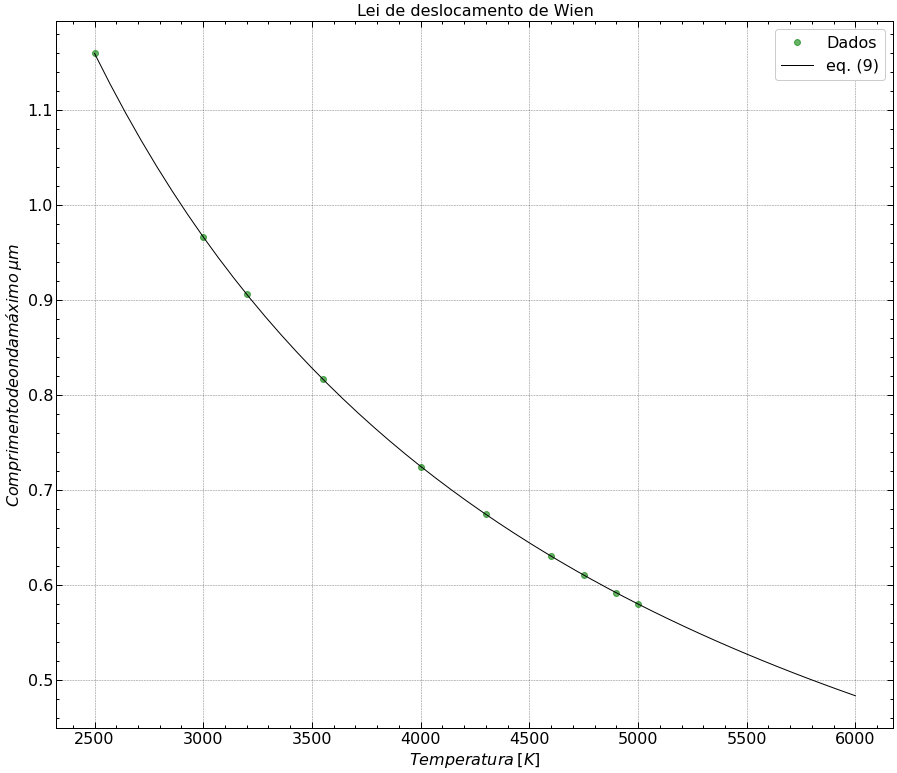

In [10]:
figure = plt.figure(figsize=(15,13))
plt.plot(temp_array, comp_array, 'yo', color = 'green', label = 'Dados', alpha = 0.6)
plt.plot(x, fit_test(x, A, B), label = 'eq. (9)', lw=1, ms=3, color='black')
plt.legend()

plt.xlabel('$ Temperatura \: [K] $')
plt.ylabel('$ Comprimento de onda máximo \: \mu m $')
plt.title('Lei de deslocamento de Wien')

plt.show()

Obtendo o valor de R^2

In [11]:
prev = []

for c in range(len(comp_array)):
    prev.append(fit_test(temp_array[c], A, B))

In [12]:
import sklearn.metrics as sm

In [16]:
r_squared = sm.r2_score(comp_array, prev)
round(r_squared, 8)

0.99999748

$$ R^{2} \approx 0,999 $$

2) Fazer um gráfico da temperatura (eixo x) versus intensidade da radiação (eixo y) e usar como função de ajuste (fit wizard no qtiplot) sigma*x^A. Comparar os valores obtidos para os parâmetros. sigma e A com os esperados pela Lei de Stefan-Boltzmann. 

$$ I(x)=\sigma x^{b}$$

In [17]:
def fit_test1(x, 𝜎, b1):
    return 𝜎*x**b1

$$ Curvas \: de \: Planck $$
$$ I(\lambda, T) = \frac{2\pi h c^{2}}{\lambda^{5}}e^{\frac{hc}{\lambda KT}} $$

In [18]:
def I(𝜆, T):
    h = 6.626e-34   #J/Hz
    c = 3.0e+8      #m/s
    k = 1.38e-23    #J/K
    return ((2*np.pi*h*c**2)/𝜆**5)*np.exp(-h*c/(𝜆*k*T))

$$ Lei \: de \: Stefan-Boltzmann$$
$$ W = \sigma T^{4}$$
$$ \sigma = 5,6697*10^{-8} \frac{W}{m^{2}K^{4}} $$ 

In [26]:
def W(temp):
    𝜎 = 5.6697*10**(-8)   #W/m2K4.
    return (𝜎*temp**4)/10**6

In [45]:
params, params_covariance = optimize.curve_fit(fit_test1, temp_array,  em_array, maxfev=5000)
𝜎, b1 = params
𝜎, round(b1, 8)

(1.302170537581401e-17, 4.99860088)

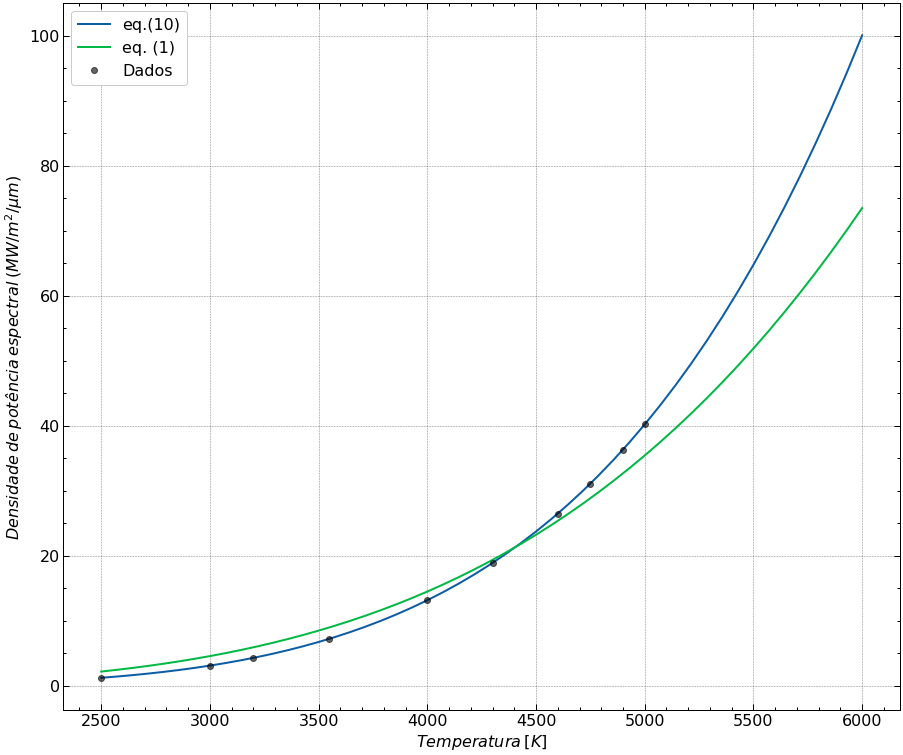

In [46]:
figure = plt.figure(figsize=(15,13))
plt.plot(x, fit_test1(x, 𝜎, b1), label='eq.(10)')
plt.plot(x, W(x), label='eq. (1)')

plt.plot(temp_array, em_array, 'yo', alpha = 0.6, color = 'black', label='Dados')

plt.xlabel('$ Temperatura \: [K] $')
plt.ylabel('$ Densidade \: de \: potência \: espectral \: ( MW/m^{2}/\mu m) $')

plt.legend()
plt.show()

In [35]:
prev1 = []

for c in range(len(temp_array)):
    prev1.append(fit_test1(temp_array[c], 𝜎, b1))

In [37]:
r_squared = sm.r2_score(em_array, prev1)
round(r_squared, 8)

0.99999997

$$ R^{2} \approx 0,9999$$

Para fins de comparação

In [39]:
comp_array_nm = list(map(lambda x: x/10**6, comp_array))
em_array_nm = list(map(lambda x: x, em_array))

In [40]:
params, params_covariance = optimize.curve_fit(fit_test1, comp_array_nm, em_array_nm, maxfev=10000)
𝜎1, b2 = params
𝜎1, b2

<ipython-input-17-922e8ff839db>:2: RuntimeWarning: overflow encountered in power
  return 𝜎*x**b1


(2.3415776256133372e-30, -5.0081174677386695)

In [41]:
wavelengths = np.arange(1e-9, 2E-6, 1e-9)

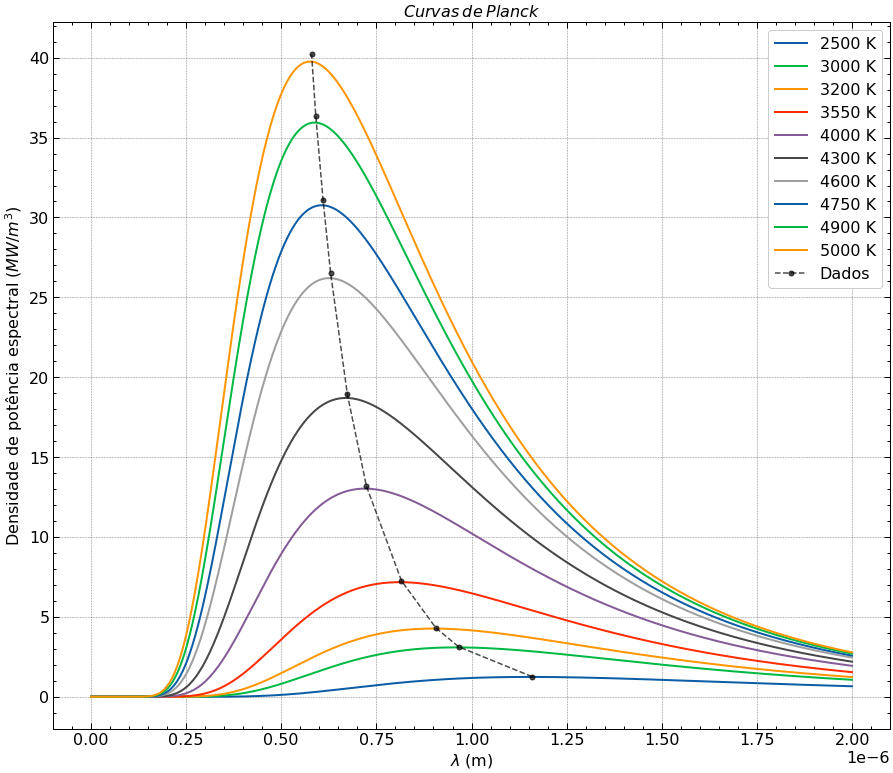

In [48]:
figure = plt.figure(figsize=(15,13))

plt.plot(wavelengths, I(wavelengths, temp_array[0])/10**12, label = '{:.0f} K' .format(temp_array[0]))
plt.plot(wavelengths, I(wavelengths, temp_array[1])/10**12, label = '{:.0f} K' .format(temp_array[1]))
plt.plot(wavelengths, I(wavelengths, temp_array[2])/10**12, label = '{:.0f} K' .format(temp_array[2]))
plt.plot(wavelengths, I(wavelengths, temp_array[3])/10**12, label = '{:.0f} K' .format(temp_array[3]))
plt.plot(wavelengths, I(wavelengths, temp_array[4])/10**12, label = '{:.0f} K' .format(temp_array[4]))
plt.plot(wavelengths, I(wavelengths, temp_array[5])/10**12, label = '{:.0f} K' .format(temp_array[5]))
plt.plot(wavelengths, I(wavelengths, temp_array[6])/10**12, label = '{:.0f} K' .format(temp_array[6]))
plt.plot(wavelengths, I(wavelengths, temp_array[7])/10**12, label = '{:.0f} K' .format(temp_array[7]))
plt.plot(wavelengths, I(wavelengths, temp_array[8])/10**12, label = '{:.0f} K' .format(temp_array[8]))
plt.plot(wavelengths, I(wavelengths, temp_array[9])/10**12, label = '{:.0f} K' .format(temp_array[9]))

#plt.plot(comp_array_nm , fit_test1(comp_array_nm, 𝜎1, b2), '--',color='purple', lw=1.7, ms=5, alpha = 0.8, label = 'Ajuste eq. (xx)')
plt.plot(comp_array_nm, em_array_nm, 'o--', label = 'Dados', lw=1.5, ms=5, alpha = 0.7, color = 'black' )

plt.ylabel('Densidade de potência espectral ($MW/m^3$)')
plt.xlabel(r'$\lambda\;(\mathrm{m})$')


plt.legend()

plt.title('$Curvas \: de\: Planck$')
plt.show()